In [1]:
import pandas as pd
import numpy as np
import re
from tensorflow.keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

In [3]:
Data_path='//content/drive/MyDrive/archive (7)/IMDB Dataset.csv'
df = pd.read_csv(Data_path)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [4]:
df['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

Text(0.5, 1.0, 'Sentiment Field Distribution\n25000\n25000')

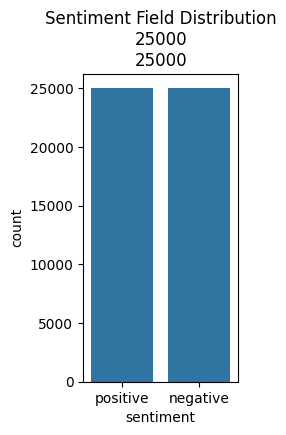

In [5]:
val_count=df["sentiment"].value_counts()
plt.figure(figsize= (2,4))
sns.countplot(data = df, x= 'sentiment')
plt.title(f'Sentiment Field Distribution\n{val_count.to_string(index=False, header=None)}')

In [6]:
df.loc[df["sentiment"] == 'positive', "sentiment"] = 1
df.loc[df["sentiment"] == 'negative', "sentiment"] = 0

In [7]:
df['sentiment'].unique()

array([1, 0], dtype=object)

In [8]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
stop_words = set(stopwords.words('english'))
def clean_text(sentence):
    # Removing URLS
    sentence = re.sub(r"https?://\S+|www\.\S+"," ",sentence)

    # Removing html tags
    sentence = re.sub(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});"," ",sentence)

    # Removing the Punctuation
    sentence = re.sub(r"[^\w\s]", " ", sentence)

    # Removing words that have numbers
    sentence = re.sub(r"\w*\d\w*", " ", sentence)

    # Removing Digits
    sentence = re.sub(r"[0-9]+", " ", sentence)

    # Cleaning white spaces
    sentence = re.sub(r"\s+", " ", sentence).strip()

    sentence = sentence.lower()
    # Check stop words
    tokens = []
    for token in sentence.split():
        if token not in stop_words:
            tokens.append(token)
    return " ".join(tokens)

In [ ]:
df.loc[:, 'review'] = df['review'].apply(clean_text)

In [ ]:
df.head()

,review,sentiment
0,one reviewers mentioned watching oz episode ho...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically family little boy jake thinks zombie...,0
4,petter mattei love time money visually stunnin...,1


In [10]:
df['review'][1]


'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [11]:
X = df['review']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

print("Train Data size:", len(X_train), len(y_train))
print("Test Data size", len(X_test), len(y_test))

Train Data size: 40000 40000
Test Data size 10000 10000


In [12]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Convert text to sequences of integers
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

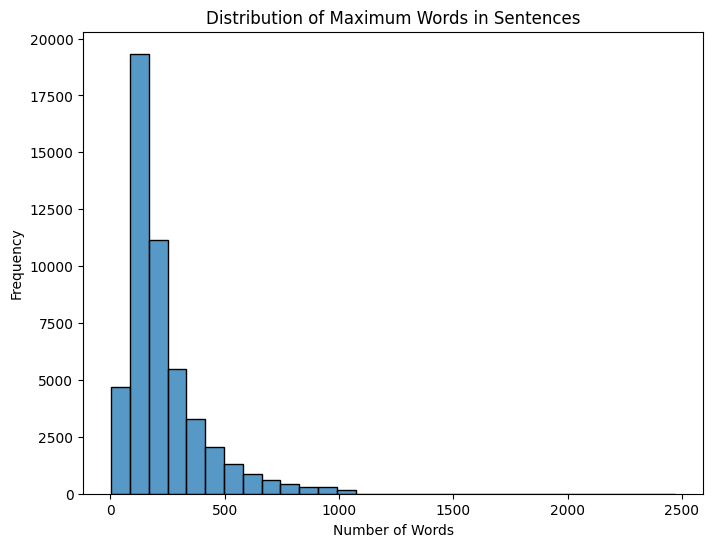

In [13]:
max_words = df['review'].apply(lambda x: len(x.split()))

# Plotting the distribution of the maximum number of words in sentences
plt.figure(figsize=(8, 6))
sns.histplot(max_words, bins=30)
plt.title('Distribution of Maximum Words in Sentences')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

In [14]:
max_len = 200  # Maximum words in each sequence.
batch_size=128

In [15]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [16]:
vocabulary_size = len(tokenizer.word_index)
vocabulary_size

112472

In [17]:
!wget http://nlp.stanford.edu/data/glove.6B.zip


--2024-09-19 07:44:09--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-09-19 07:44:09--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-09-19 07:44:09--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [18]:
!unzip glove.6B.zip


Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assume tokenizer is already fitted on your data
vocabulary_size = len(tokenizer.word_index) + 1

# Load GloVe embeddings
embedding_index = {}
with open('/content/glove.6B.100d.txt') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

# Create embedding matrix
embedding_matrix = np.zeros((vocabulary_size, 100))
for word, i in tokenizer.word_index.items():
    if i < vocabulary_size:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

# Define model with improvements
model = Sequential()
model.add(Embedding(input_dim=vocabulary_size, output_dim=100,
                    weights=[embedding_matrix], trainable=True))  # Set trainable to True for fine-tuning
model.add(Bidirectional(LSTM(units=256, return_sequences=True, dropout=0.3, recurrent_dropout=0.3)))  # Increased LSTM units and return sequences
model.add(Bidirectional(LSTM(units=128, dropout=0.3, recurrent_dropout=0.3)))  # Add an additional LSTM layer
model.add(Dropout(0.5))  # Increased dropout for regularization
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile model with reduced learning rate
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.00001), metrics=['accuracy'])

# Preprocess data
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train).astype('float32')
y_test = np.array(y_test).astype('float32')

# Pad sequences
max_len = 150  # Increase the max_len to capture more information
X_train = pad_sequences(X_train, maxlen=max_len, padding='post')
X_test = pad_sequences(X_test, maxlen=max_len, padding='post')

# Train model with more epochs and smaller batch size for better generalization
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2615s 4s/step - accuracy: 0.5048 - loss: 0.7028 - val_accuracy: 0.6032 - val_loss: 0.6867
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2680s 4s/step - accuracy: 0.5219 - loss: 0.6954 - val_accuracy: 0.6229 - val_loss: 0.6820
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2602s 4s/step - accuracy: 0.5331 - loss: 0.6904 - val_accuracy: 0.6402 - val_loss: 0.6730
Epoch 4/10
119/625 ━━━━━━━━━━━━━━━━━━━━ 32:51 4s/step - accuracy: 0.5508 - loss: 0.6877

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

y_train = y_train.astype('int32')
y_test = y_test.astype('int32')

In [ ]:
history=model.fit(X_train, y_train, epochs=5,validation_data=(X_test, y_test),batch_size=batch_size)

Epoch 1/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 274s 3s/step - accuracy: 0.5195 - loss: 0.6926 - val_accuracy: 0.6358 - val_loss: 0.6893
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 309s 3s/step - accuracy: 0.6482 - loss: 0.6715 - val_accuracy: 0.8385 - val_loss: 0.4913
Epoch 3/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 258s 3s/step - accuracy: 0.8489 - loss: 0.4303 - val_accuracy: 0.8672 - val_loss: 0.3254
Epoch 4/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 243s 3s/step - accuracy: 0.8892 - loss: 0.3047 - val_accuracy: 0.8782 - val_loss: 0.2935
Epoch 5/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 262s 3s/step - accuracy: 0.9134 - loss: 0.2442 - val_accuracy: 0.8825 - val_loss: 0.2811


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 100, 100)            │       9,108,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 256)                 │         234,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,911,265 (37.81 MB)

 Trainable params: 267,521 (1.02 MB)

 Non-trainable params: 9,108,700 (34.75 MB)

 Optimizer params: 535,044 (2.04 MB)

313/313 ━━━━━━━━━━━━━━━━━━━━ 36s 111ms/step


Text(95.72222222222221, 0.5, 'Truth')

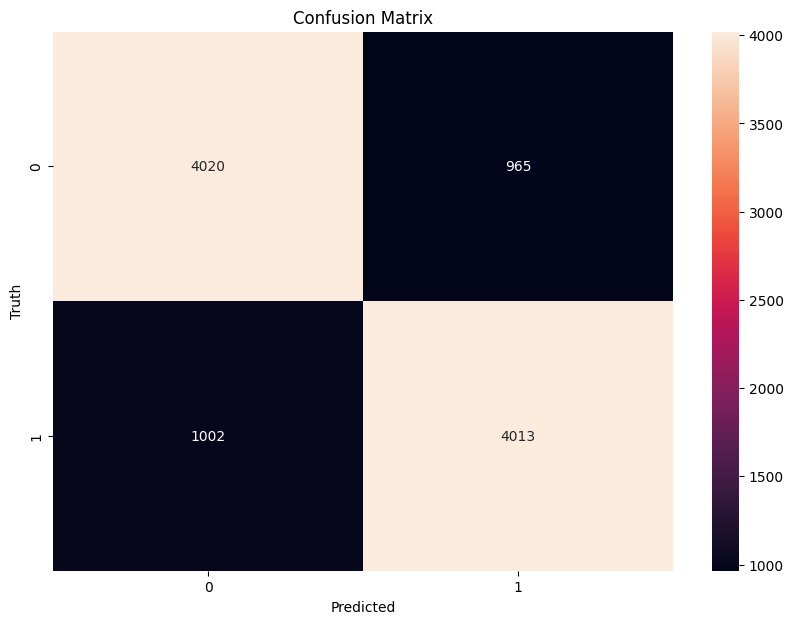

In [ ]:
y_pred = model.predict(X_test)
y_pred_rounded = np.round(y_pred)
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_rounded)


plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print("Classification Report: \n", classification_report(y_test, y_pred_rounded))

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.80      0.81      0.80      4985
         1.0       0.81      0.80      0.80      5015

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000

